In [ ]:
## With output - target and subtracting difference from weights

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("E:/THI/AIAS - Artificial_Intelligence_of_Automotive_Sys/Project/CarData/CarData/csv_file_trial2.csv")

#data.head(10)

## data sorting and initialization

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#data_dev = data[0:99].T
#Y_dev = data_dev[0]
#X_dev = data_dev[1:n]
#X_dev = X_dev / 255.

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

#print(n)
#Y_train
#Y_dev
#X_train[:, 0].shape


## defining functions for fprop and bprop for updation of NN

def init_params():
    W1 = np.random.rand(300, 4000) - 0.5 #since 1st hidden layer has 10 nodes
    b1 = np.random.rand(300, 1) - 0.5  #since 1st hidden layer has 10 nodes
    W2 = np.random.rand(30, 300) - 0.5 #since 2nd hidden layer has 3 nodes
    b2 = np.random.rand(30, 1) - 0.5  #since 2nd hidden layer has 3 nodes, should be 2 but changed due to error
    W3 = np.random.rand(1, 30) - 0.5 #since 2nd hidden layer has 3 nodes
    b3 = np.random.rand(1, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)))
    #A = np.exp(Z) / sum(np.exp(Z)) ## changed due to runtime error
    return Z
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def sigmoid_deriv(Z):
    sig_x = sigmoid(Z)
    return sig_x * (1 - sig_x)

def one_hot(Y):
    #one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Y.size=m(number of samples) & Y.max=number of classes(here 0 to 9)
    #one_hot_Y[np.arange(Y.size), Y] = 1
    #one_hot_Y = one_hot_Y.T
    #return one_hot_Y
    return Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    #dZ2 = A2 - one_hot_Y
    #dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2  
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3  
    return W1, b1, W2, b2, W3, b3

##Running the epochs on NN - Final step

def get_predictions(A3):
    return A3
    #return np.argmax(A3, 0)



def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def mean_of_subtract(output, target):
    # Ensure that X and Y have the same shape
    #assert X.shape == Y.shape, "Input matrices must have the same shape"
    print(target, output)
    # Subtract each element of Y - X
    subtracted_matrix = target - output
    
    # Calculate the mean of all values in the subtracted matrix
    mean_result = np.mean(subtracted_matrix)
    
    return mean_result

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2 ,dW3 ,db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            #print(A1)
            #predictions = get_predictions(A2)
            print(get_accuracy(A3, Y))
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.6, 200)



Iteration:  0
0.5062064948648772
Iteration:  5
0.5381132154532804
Iteration:  10
0.5369567229894641
Iteration:  15
0.5749625147155454
Iteration:  20
0.5806388760685695
Iteration:  25
0.614457100825674
Iteration:  30
0.6284245941438551
Iteration:  35
0.6656410499888205
Iteration:  40
0.6810417079482144
Iteration:  45
0.7152368122908008
Iteration:  50
0.7392001050071931
Iteration:  55
0.7677632728241417
Iteration:  60
0.7977430456240703
Iteration:  65
0.8243504607017462
Iteration:  70
0.8531033880168634
Iteration:  75
0.8723066199011419
Iteration:  80
0.8946186272896527
Iteration:  85
0.9054561591590167
Iteration:  90
0.9172818004508321
Iteration:  95
0.9230050483794712
Iteration:  100
0.9300628396675318
Iteration:  105
0.9343537699199058
Iteration:  110
0.9393194662901673
Iteration:  115
0.9429313626188836
Iteration:  120
0.946675015420038
Iteration:  125
0.9497930941271476
Iteration:  130
0.9527831212557818
Iteration:  135
0.9554682619796097
Iteration:  140
0.9579690723291305
Iteration

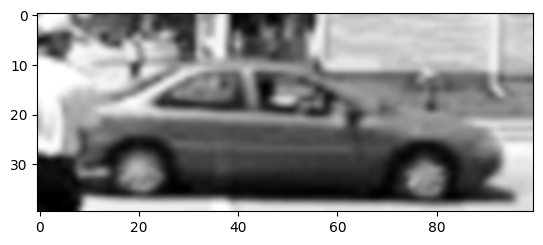

In [2]:
## With output - target and subtracting difference from weights current working code

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("E:/THI/AIAS - Artificial Intelligence of Automotive Sys/Project/CarData/CarData/csv_file_full.csv")

#data.head(10)

## data sorting and initialization

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_val = data[751:1050].T
Y_val = data_val[0]
X_val = data_val[1:]
X_val = X_val / 255.

data_train = data[0:750].T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.
_,m_train = X_train.shape

#print(n)
#Y_train
#Y_dev
#X_train[:, 0].shape


## defining functions for fprop and bprop for updation of NN

def init_params():
    W1 = np.random.rand(300, 4000) - 0.5 
    b1 = np.random.rand(300, 1) - 0.5  
    W2 = np.random.rand(30, 300) - 0.5 
    b2 = np.random.rand(30, 1) - 0.5  
    W3 = np.random.rand(1, 30) - 0.5 
    b3 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)))
    #A = np.exp(Z) / sum(np.exp(Z)) ## changed due to runtime error
    return Z
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def sigmoid_deriv(Z):
    sig_x = sigmoid(Z)
    return sig_x * (1 - sig_x)

def one_hot(Y):
    #one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Y.size=m(number of samples) & Y.max=number of classes(here 0 to 9)
    #one_hot_Y[np.arange(Y.size), Y] = 1
    #one_hot_Y = one_hot_Y.T
    #return one_hot_Y
    return Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = one_hot_Y - A3
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    #dZ2 = A2 - one_hot_Y
    #dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 + alpha * dW1
    b1 = b1 + alpha * db1    
    W2 = W2 + alpha * dW2  
    b2 = b2 + alpha * db2  
    W3 = W3 + alpha * dW3
    b3 = b3 + alpha * db3  
    return W1, b1, W2, b2, W3, b3

##Running the epochs on NN - Final step

def get_predictions(A3):
    return A3
    #return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def accuracy_mean(output, target):
    #print(output, target)
    absolute_difference = np.abs(target - output)
    
    ones_matrix = np.ones_like(output)
    
    result_matrix = ones_matrix - absolute_difference
    
    mean_result = np.mean(result_matrix)
    
    return mean_result

#def epochs_alpha():


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2 ,dW3 ,db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 5 == 0:
            print("Iteration: ", i)
            #print(A1)
            #predictions = get_predictions(A2)
            print(accuracy_mean(A3, Y))
            #print(get_accuracy(A3, Y))
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.8, 500)

def val_forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return A3

def validation(X, Y):
    A3 = val_forward_prop(W1, b1, W2, b2, W3, b3, X)
    print(A3, Y)
    print(accuracy_mean(A3, Y))
    index = 3 #input any value between 0 to 249
    current_image = X[:, index, None]
    label = Y[index]
    output = A3[:, index]
    accuracy = (1 - (label - output)) * 100
    print("Expected Label: ", label)
    if output > 0.95:
        print("Predicted Label:", output, "The image contains a car")
    else:
        print("Predicted Label:", output, "The image does not contain a car")
    #print("Accuracy:", accuracy ,"%")
    current_image = current_image.reshape((40, 100)) * 255
    plt.gray()
    #plt.figure(figsize=(4, 6))
    plt.imshow(current_image, cmap='gray', interpolation='bicubic')
    #plt.imshow(current_image, interpolation='bicubic')
    plt.show()

    return W1, W2, W3

W1, W2, W3 = validation(X_val, Y_val)



Iteration:  0
Training accuracy= 0.0
Iteration:  20
Training accuracy= 0.005
Iteration:  40
Training accuracy= 0.365
Iteration:  60
Training accuracy= 0.68625
Iteration:  80
Training accuracy= 0.795
Iteration:  100
Training accuracy= 0.845
Iteration:  120
Training accuracy= 0.885
Iteration:  140
Training accuracy= 0.91625
Iteration:  160
Training accuracy= 0.93375
Iteration:  180
Training accuracy= 0.94375
Iteration:  200
Training accuracy= 0.95625
Iteration:  220
Training accuracy= 0.96375
Iteration:  240
Training accuracy= 0.97125
Iteration:  260
Training accuracy= 0.975
Iteration:  280
Training accuracy= 0.97875
Iteration:  300
Training accuracy= 0.98375
Iteration:  320
Training accuracy= 0.98875
Iteration:  340
Training accuracy= 0.99
Iteration:  360
Training accuracy= 0.99125
Iteration:  380
Training accuracy= 0.9925
[[5.14850177e-03 4.53519218e-03 9.98710006e-01 9.98867165e-01
  9.99238239e-01 9.99163350e-01 9.98691944e-01 3.01239281e-03
  9.97598669e-01 9.93204328e-01 3.60159663

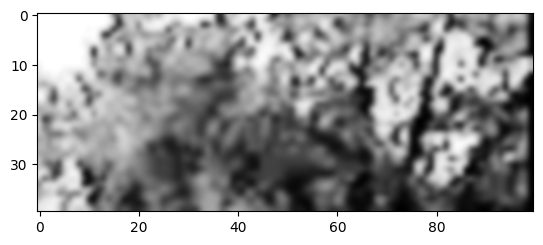

Expected Label:  0
Predicted Label: [0.00453519] The image does not contain a car


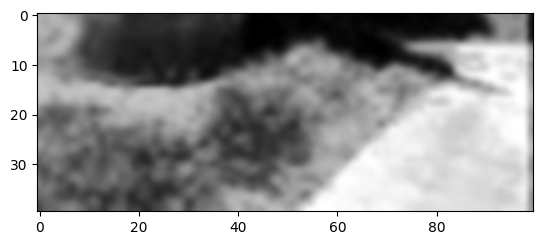

Expected Label:  1
Predicted Label: [0.99871001] The image contains a car


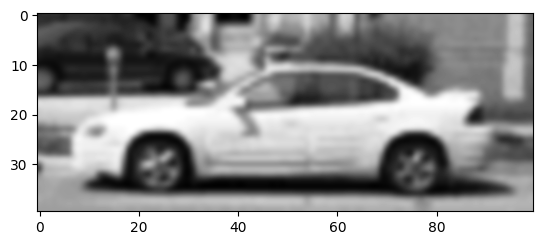

Expected Label:  1
Predicted Label: [0.99886716] The image contains a car


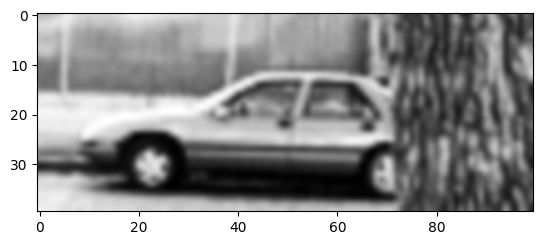

Expected Label:  1
Predicted Label: [0.99923824] The image contains a car


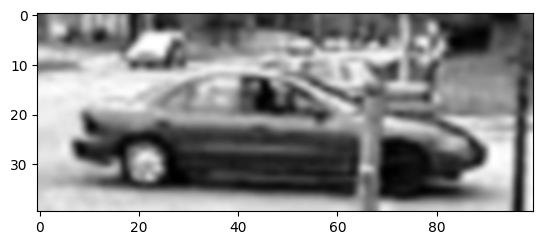

In [6]:
## final code 18-1-2023 for mean accuracy modified

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("E:/THI/AIAS - Artificial Intelligence of Automotive Sys/Project/CarData/CarData/csv_file_full.csv")

#data.head(10)

## data sorting and initialization

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_val = data[801:1050].T
Y_val = data_val[0]
X_val = data_val[1:]
X_val = X_val / 255.

data_train = data[0:800].T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.
_,m_train = X_train.shape

#print(n)
#Y_train
#Y_dev
#X_train[:, 0].shape


## defining functions for fprop and bprop for updation of NN

def init_params():
    W1 = np.random.rand(300, 4000) - 0.5 
    b1 = np.random.rand(300, 1) - 0.5  
    W2 = np.random.rand(30, 300) - 0.5 
    b2 = np.random.rand(30, 1) - 0.5  
    W3 = np.random.rand(1, 30) - 0.5 
    b3 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def ReLU(Z):
    return np.maximum(Z, 0)

    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def sigmoid_deriv(Z):
    sig_x = sigmoid(Z)
    return sig_x * (1 - sig_x)

def one_hot(Y):

    return Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = one_hot_Y - A3
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    #dZ2 = A2 - one_hot_Y
    #dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 + alpha * dW1
    b1 = b1 + alpha * db1    
    W2 = W2 + alpha * dW2  
    b2 = b2 + alpha * db2  
    W3 = W3 + alpha * dW3
    b3 = b3 + alpha * db3  
    return W1, b1, W2, b2, W3, b3

##Running the epochs on NN - Final step

def get_predictions(A3):
    return A3
    #return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def accuracy_mean_train(output, target, threshold = 0.8): #the prediction is considered only if it is 80% sure
    #print(output, target)
    total_elements = np.prod(output.shape)
    correct_count = 0
    ones_matrix = np.ones_like(output)
    absolute_difference = np.abs(target - output)
    absolute_accuracy = ones_matrix - absolute_difference
    a, b = absolute_accuracy.shape
    for i in range(b):
        if absolute_accuracy[0,i] > threshold:
            correct_count += 1
    

    #print("Total images=", total_elements)
    #print("Correct Predictions=", correct_count)
    mean_accuracy = correct_count / total_elements
    #print("Mean Accuracy=", mean_accuracy)
    #result_matrix = ones_matrix - absolute_difference
    #mean_result = np.mean(result_matrix)
    
    return mean_accuracy

def accuracy_mean_val(output, target, threshold = 0.8): #the prediction is considered only if it is 80% sure
    #print(output, target)
    total_elements = np.prod(output.shape)
    correct_count = 0
    ones_matrix = np.ones_like(output)
    absolute_difference = np.abs(target - output)
    absolute_accuracy = ones_matrix - absolute_difference
    a, b = absolute_accuracy.shape
    for i in range(b):
        if absolute_accuracy[0,i] > threshold:
            correct_count += 1
    

    print("Total images=", total_elements)
    print("Correct Predictions=", correct_count)
    mean_accuracy = correct_count / total_elements
    #print("Mean Accuracy=", mean_accuracy)
    #result_matrix = ones_matrix - absolute_difference
    #mean_result = np.mean(result_matrix)
    
    return mean_accuracy

def accuracy_mean(output, target, threshold = 0.8): #the prediction is considered only if it is 80% sure
    #print(output, target)
    total_elements = np.prod(output.shape)
    correct_count = 0
    ones_matrix = np.ones_like(output)
    absolute_difference = np.abs(target - output)
    absolute_accuracy = ones_matrix - absolute_difference
    a, b = absolute_accuracy.shape
    for i in range(b):
        if absolute_accuracy[0,i] > threshold:
            correct_count += 1
    

    print("Total images=", total_elements)
    print("Correct Predictions=", correct_count)
    mean_accuracy = correct_count / total_elements
    print("Mean Accuracy=", mean_accuracy)
    #result_matrix = ones_matrix - absolute_difference
    #mean_result = np.mean(result_matrix)
    
    return mean_accuracy

#def epochs_alpha():


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2 ,dW3 ,db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 20 == 0:
            print("Iteration: ", i)
            #print(A1)
            #predictions = get_predictions(A2)
            print("Training accuracy=",accuracy_mean_train(A3, Y))
            #print(get_accuracy(A3, Y))
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.4, 400)

def val_forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return A3

def validation(X, Y):
    A3 = val_forward_prop(W1, b1, W2, b2, W3, b3, X)
    print(A3, Y)
    print("Validation accuracy=",accuracy_mean_val(A3, Y))
    index = 5 #input any value between 0 to 249
    for i in range(index):
        current_image = X[:, i, None]
        label = Y[i]
        output = A3[:, i]
        accuracy = (1 - (label - output)) * 100
        print("Expected Label: ", label)
        if output > 0.8:
            print("Predicted Label:", output, "The image contains a car")
        elif output < 0.2:
            print("Predicted Label:", output, "The image does not contain a car")
        else:
            print("Not Sure")
        current_image = current_image.reshape((40, 100)) * 255
        plt.gray()
        #plt.figure(figsize=(4, 6))
        plt.imshow(current_image, cmap='gray', interpolation='bicubic')
        #plt.imshow(current_image, interpolation='bicubic')
        plt.show()

    return W1, W2, W3

W1, W2, W3 = validation(X_val, Y_val)



Iteration:  0
Training accuracy= 0.0
Total images= 299
Correct Predictions= 0
Validation accuracy= 0.0
Iteration:  10
Training accuracy= 0.13866666666666666
Total images= 299
Correct Predictions= 91
Validation accuracy= 0.30434782608695654
Iteration:  20
Training accuracy= 0.2693333333333333
Total images= 299
Correct Predictions= 123
Validation accuracy= 0.411371237458194
Iteration:  30
Training accuracy= 0.4146666666666667
Total images= 299
Correct Predictions= 138
Validation accuracy= 0.46153846153846156
Iteration:  40
Training accuracy= 0.48933333333333334
Total images= 299
Correct Predictions= 147
Validation accuracy= 0.4916387959866221
Iteration:  50
Training accuracy= 0.6373333333333333
Total images= 299
Correct Predictions= 177
Validation accuracy= 0.5919732441471572
Iteration:  60
Training accuracy= 0.7533333333333333
Total images= 299
Correct Predictions= 212
Validation accuracy= 0.7090301003344481
Iteration:  70
Training accuracy= 0.8493333333333334
Total images= 299
Correct 

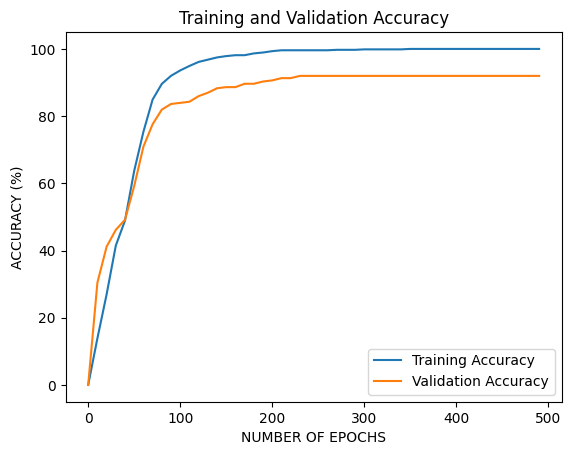

In [1]:
## final code 18-1-2023 for plotting of graph only

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("E:/THI/AIAS - Artificial Intelligence of Automotive Sys/Project/CarData/CarData/csv_file_full.csv")

#data.head(10)

## data sorting and initialization

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_val = data[751:1050].T
Y_val = data_val[0]
X_val = data_val[1:]
X_val = X_val / 255.

data_train = data[0:750].T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.
_,m_train = X_train.shape

#print(n)
#Y_train
#Y_dev
#X_train[:, 0].shape


## defining functions for fprop and bprop for updation of NN

def init_params():
    W1 = np.random.rand(300, 4000) - 0.5 
    b1 = np.random.rand(300, 1) - 0.5  
    W2 = np.random.rand(30, 300) - 0.5 
    b2 = np.random.rand(30, 1) - 0.5  
    W3 = np.random.rand(1, 30) - 0.5 
    b3 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)))
    #A = np.exp(Z) / sum(np.exp(Z)) ## changed due to runtime error
    return Z
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def sigmoid_deriv(Z):
    sig_x = sigmoid(Z)
    return sig_x * (1 - sig_x)

def one_hot(Y):
    #one_hot_Y = np.zeros((Y.size, Y.max() + 1)) #Y.size=m(number of samples) & Y.max=number of classes(here 0 to 9)
    #one_hot_Y[np.arange(Y.size), Y] = 1
    #one_hot_Y = one_hot_Y.T
    #return one_hot_Y
    return Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = one_hot_Y - A3
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    #dZ2 = A2 - one_hot_Y
    #dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dZ2 = W3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 + alpha * dW1
    b1 = b1 + alpha * db1    
    W2 = W2 + alpha * dW2  
    b2 = b2 + alpha * db2  
    W3 = W3 + alpha * dW3
    b3 = b3 + alpha * db3  
    return W1, b1, W2, b2, W3, b3

##Running the epochs on NN - Final step


def accuracy_mean_val(output, target, threshold = 0.8): #the prediction is considered only if it is 80% sure
    #print(output, target)
    total_elements = np.prod(output.shape)
    correct_count = 0
    ones_matrix = np.ones_like(output)
    absolute_difference = np.abs(target - output)
    absolute_accuracy = ones_matrix - absolute_difference
    a, b = absolute_accuracy.shape
    for i in range(b):
        if absolute_accuracy[0,i] > threshold:
            correct_count += 1
    

    print("Total images=", total_elements)
    print("Correct Predictions=", correct_count)
    mean_accuracy = correct_count / total_elements
    #print("Mean Accuracy=", mean_accuracy)
    #result_matrix = ones_matrix - absolute_difference
    #mean_result = np.mean(result_matrix)
    
    return mean_accuracy

def accuracy_mean_train(output, target, threshold = 0.8): #the prediction is considered only if it is 80% sure
    #print(output, target)
    total_elements = np.prod(output.shape)
    correct_count = 0
    ones_matrix = np.ones_like(output)
    absolute_difference = np.abs(target - output)
    absolute_accuracy = ones_matrix - absolute_difference
    a, b = absolute_accuracy.shape
    for i in range(b):
        if absolute_accuracy[0,i] > threshold:
            correct_count += 1
    

    #print("Total images=", total_elements)
    #print("Correct Predictions=", correct_count)
    mean_accuracy = correct_count / total_elements
    #print("Mean Accuracy=", mean_accuracy)
    #result_matrix = ones_matrix - absolute_difference
    #mean_result = np.mean(result_matrix)
    
    return mean_accuracy

def val_forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    #A1 = ReLU(Z1)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    #A2 = ReLU(Z2)
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3
    #A3 = ReLU(Z3)
    A3 = sigmoid(Z3)
    return A3

def validation(X, Y):
    A3 = val_forward_prop(W1, b1, W2, b2, W3, b3, X)
    #print(A3, Y)
    print("Validation accuracy=",accuracy_mean_val(A3, Y))
    return 0

def gradient_descent(X_t, Y_t, X_v, Y_v, alpha, iterations):
    iteration_list = []
    training_accuracy_list = []
    validation_accuracy_list = []
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X_t)
        dW1, db1, dW2, db2 ,dW3 ,db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X_t, Y_t)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            a_m_t = accuracy_mean_train(A3, Y_t)
            print("Training accuracy=",a_m_t)
            iteration_list.append(i)
            training_accuracy_list.append(a_m_t * 100)
        if i % 10 == 0:
            A3 = val_forward_prop(W1, b1, W2, b2, W3, b3, X_v)
            a_m_v = accuracy_mean_val(A3, Y_v)
            print("Validation accuracy=", a_m_v)
            validation_accuracy_list.append(a_m_v * 100)
            #print("Validation accuracy", acc)

    plt.plot(iteration_list, training_accuracy_list, label='Training Accuracy')
    plt.plot(iteration_list, validation_accuracy_list, label='Validation Accuracy')
    plt.xlabel('NUMBER OF EPOCHS')
    plt.ylabel('ACCURACY (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, X_val, Y_val, 0.8, 500)





#W1, W2, W3 = validation(X_val, Y_val)



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("E:/THI/AIAS - Artificial Intelligence of Automotive Sys/Project/CarData/CarData/csv_file_trial2.csv")

#data.head(10)

## data sorting and initialization

data = np.array(data)
m, n = data.shape
#np.random.shuffle(data) # shuffle before splitting into dev and training sets

#data_dev = data[0:99].T
#Y_dev = data_dev[0]
#X_dev = data_dev[1:n]
#X_dev = X_dev / 255.

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

#print(n)
Y_train
#Y_dev

#def test_prediction(index, W1, b1, W2, b2):
    #current_image = X_train[:, index, None]
    #prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    #label = Y_train[index]
    #print("Prediction: ", prediction)
    #print("Label: ", label)

index = 350
current_image = X_train[:, index, None]
label = Y_train[index]
print("Label: ", label)
current_image = current_image.reshape((40, 100)) * 255
plt.gray()
#plt.figure(figsize=(4, 6))
plt.imshow(current_image, cmap='gray', interpolation='bicubic')
#plt.imshow(current_image, interpolation='bicubic')
plt.show()